Name:Ajinkya Sunil Patil

Div:D15B, Roll No.:42

Practical No.:06

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Data Cleaning
# Drop ID column
df.drop('id', axis=1, inplace=True)

# Convert diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Initialize classifiers
classifiers = {
    'K-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


In [ ]:
# Remove outliers using Z-score
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Calculate Z-scores and filter outliers
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

print(f"Original shape: 113500, New shape after outlier removal: 7715")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Original shape: 113500, New shape after outlier removal: 7715


In [ ]:
# Train and evaluate models
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

K-NN Accuracy: 0.9597
Naive Bayes Accuracy: 0.9463
SVM Accuracy: 0.9866
Decision Tree Accuracy: 0.9262


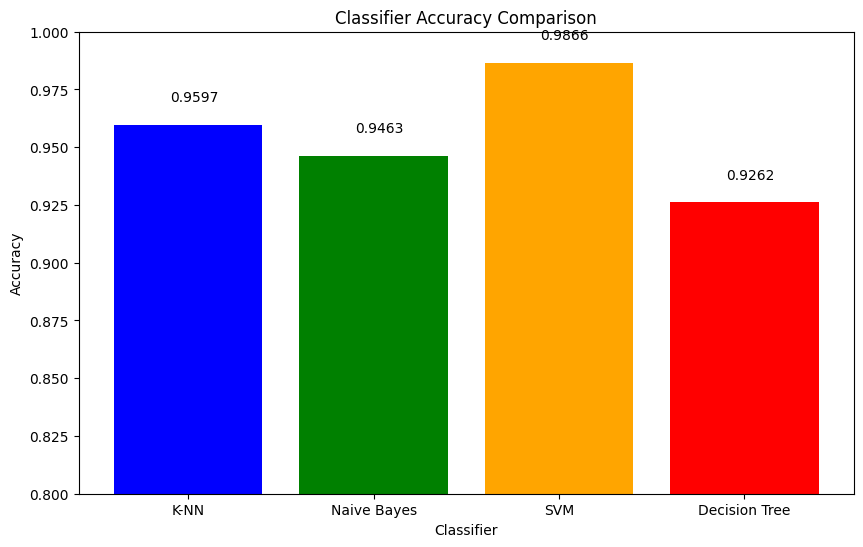

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
for i, v in enumerate(accuracies.values()):
    plt.text(i-0.1, v+0.01, f"{v:.4f}", color='black')
plt.show()